# Cost and Care: Analyzing Billing Amounts and Length of Stay in Healthcare

## Step 1 : Data Preparation

In [51]:
# Load necessary libraries
library(dplyr)
library(lubridate)
library(ggplot2)


In [52]:
# Read the data
data <- read.csv('healthcare_dataset.csv')
data

Name,Age,Gender,Blood.Type,Medical.Condition,Date.of.Admission,Doctor,Hospital,Insurance.Provider,Billing.Amount,Room.Number,Admission.Type,Discharge.Date,Medication,Test.Results
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983,146,Elective,2022-12-01,Aspirin,Inconclusive
Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.065,404,Emergency,2023-06-15,Lipitor,Normal
Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.897,292,Emergency,2019-02-08,Lipitor,Normal
Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322,480,Urgent,2020-05-03,Penicillin,Abnormal
Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344,477,Urgent,2021-08-02,Paracetamol,Normal
Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363,180,Urgent,2020-08-23,Aspirin,Abnormal
Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.436,161,Urgent,2021-04-15,Lipitor,Abnormal
Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817,384,Elective,2019-06-02,Aspirin,Normal
Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037,215,Elective,2020-12-22,Aspirin,Abnormal


In [53]:
# Convert date columns
data$Date.of.Admission <- as.Date(data$Date.of.Admission, format = "%Y-%m-%d")
data$Discharge.Date <- as.Date(data$Discharge.Date, format = "%Y-%m-%d")

# Calculate Length of Stay
data$Length.of.Stay <- as.numeric(data$Discharge.Date - data$Date.of.Admission)

# Convert categorical variables to factor
data$Gender <- as.factor(data$Gender)
data$Medical.Condition <- as.factor(data$Medical.Condition)
data$Insurance.Provider <- as.factor(data$Insurance.Provider)
data$Admission.Type <- as.factor(data$Admission.Type)


## Step 2: Descriptive Statistics and Exploratory Data Analysis

In [54]:
# Basic descriptive statistics
summary(data)

     Name                Age           Gender      Blood.Type       
 Length:10000       Min.   :18.00   Female:5075   Length:10000      
 Class :character   1st Qu.:35.00   Male  :4925   Class :character  
 Mode  :character   Median :52.00                 Mode  :character  
                    Mean   :51.45                                   
                    3rd Qu.:68.00                                   
                    Max.   :85.00                                   
    Medical.Condition Date.of.Admission       Doctor         
 Arthritis   :1650    Min.   :2018-10-30   Length:10000      
 Asthma      :1708    1st Qu.:2020-02-10   Class :character  
 Cancer      :1703    Median :2021-05-02   Mode  :character  
 Diabetes    :1623    Mean   :2021-05-01                     
 Hypertension:1688    3rd Qu.:2022-07-23                     
 Obesity     :1628    Max.   :2023-10-30                     
   Hospital                Insurance.Provider Billing.Amount   Room.Number   
 Leng

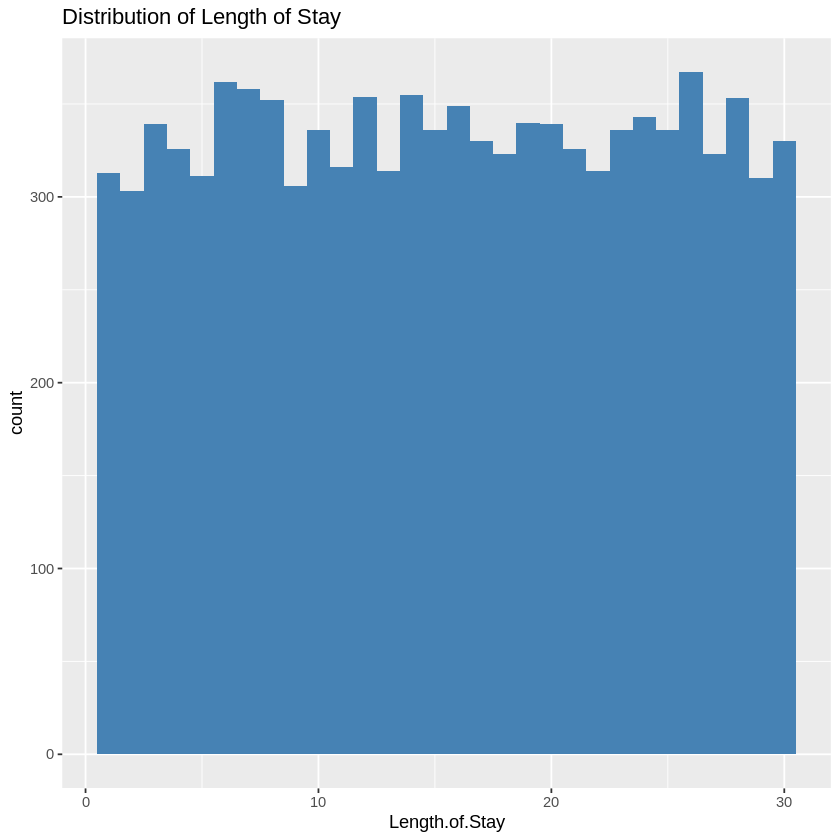

In [56]:
# Visualize the distribution of Length of Stay
ggplot(data, aes(x = Length.of.Stay)) +
  geom_histogram(bins = 30, fill = "steelblue") +
  ggtitle("Distribution of Length of Stay")

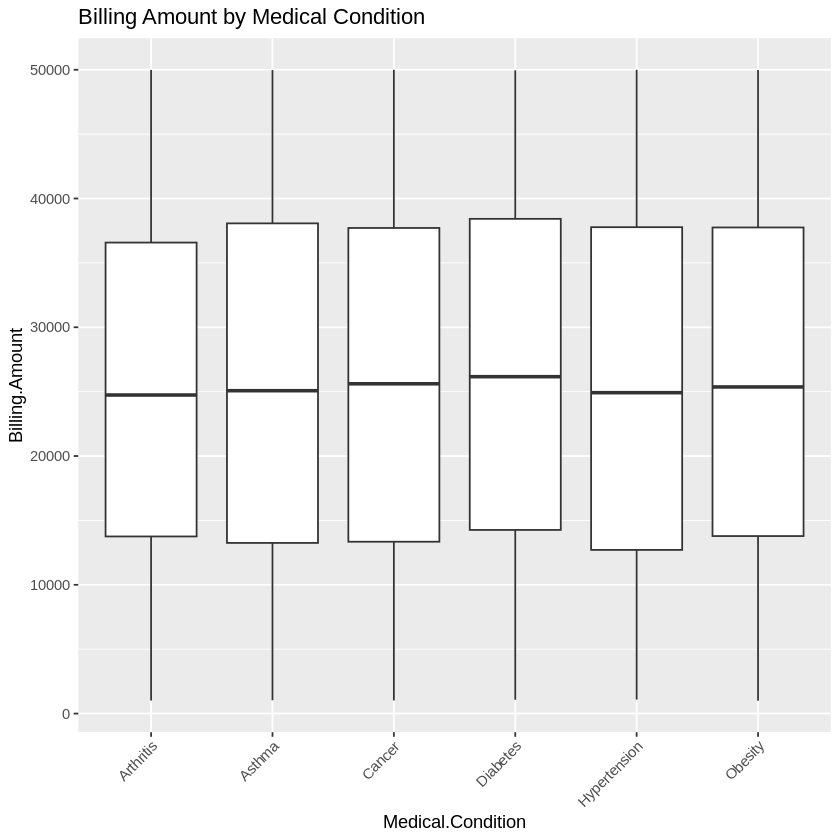

In [57]:
# Boxplot for Billing Amount by Medical Condition
ggplot(data, aes(x = Medical.Condition, y = Billing.Amount)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Billing Amount by Medical Condition")


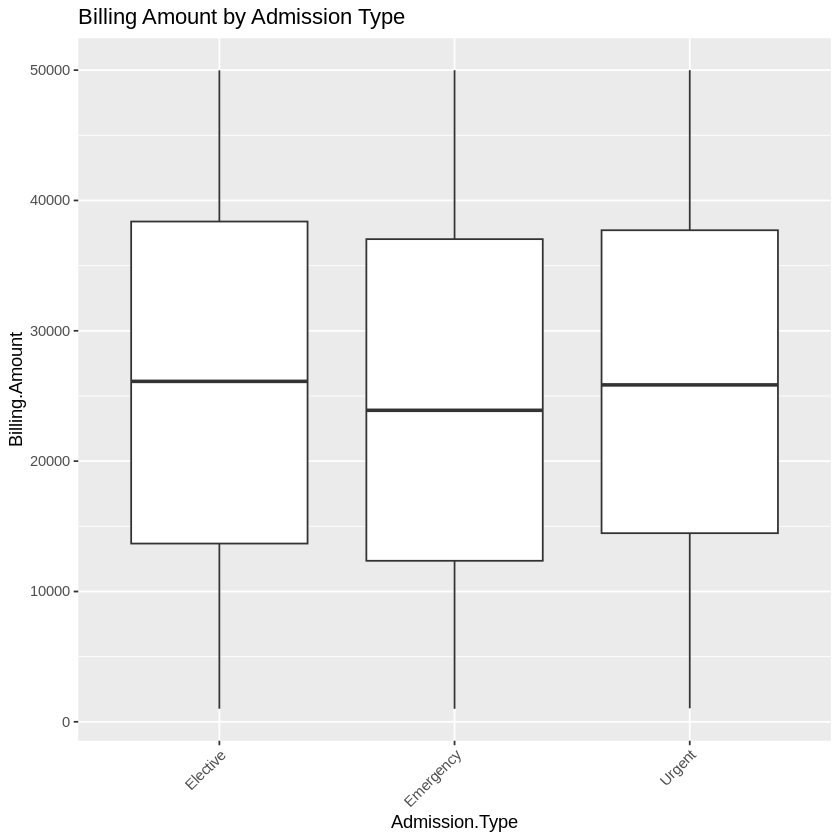

In [58]:
# Boxplot for Billing Amount by Admission Type
ggplot(data, aes(x = Admission.Type, y = Billing.Amount)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Billing Amount by Admission Type")


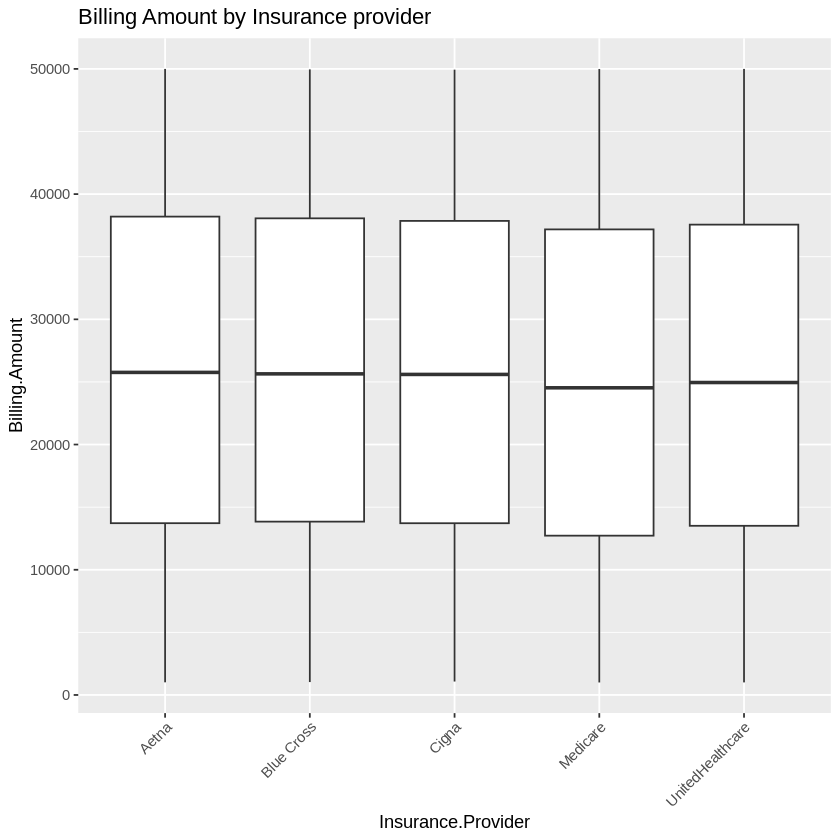

In [61]:
# Boxplot for Billing Amount by Insurance Provider
ggplot(data, aes(x = Insurance.Provider, y = Billing.Amount)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Billing Amount by Insurance provider")

`geom_smooth()` using formula = 'y ~ x'


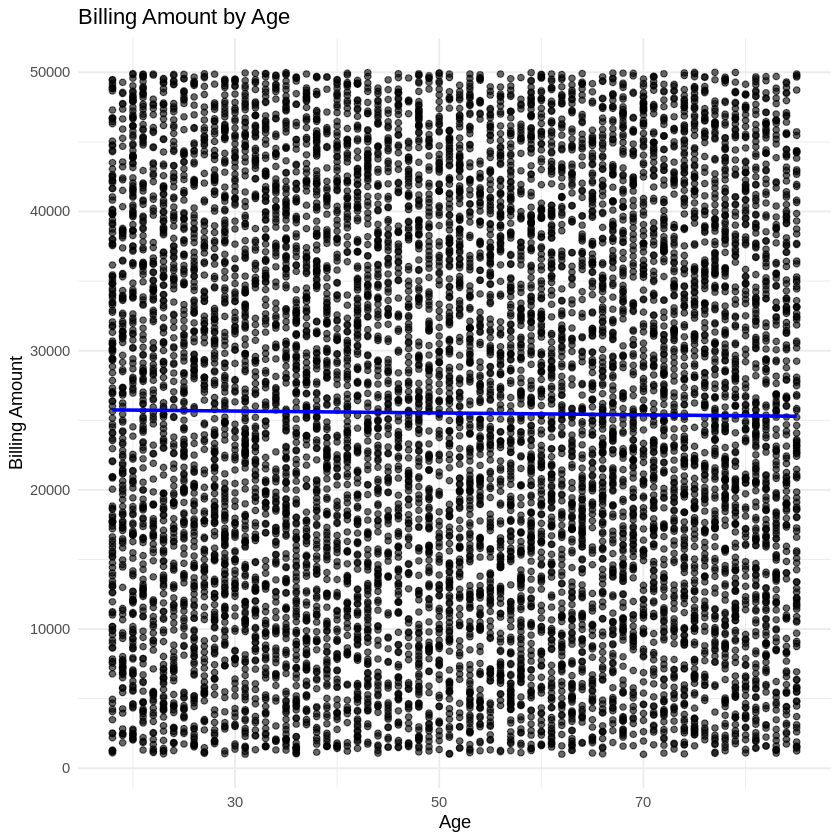

In [62]:
# visualize billing amount by age
ggplot(data, aes(x = Age, y = Billing.Amount)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Billing Amount by Age",
       x = "Age",
       y = "Billing Amount") +
  theme_minimal()


### INFERENCE:
The horizontal trend line indicates that there is no strong linear relationship between age and billing amount across the dataset. The line appears flat, suggesting that, on average, the billing amount does not increase or decrease significantly with age.


# To analyze differences in billing amounts by Gender

## Hypothesis Testing using T test

-**Null Hypothesis** : There is no significant difference in billing amount depending on the Gender of the patient.

-**Alternate Hypothesis** : There is a significant difference in billing amount depending on the Gender of the patient.

In [64]:
# Perform t-test
t_test_result <- t.test(Billing.Amount ~ Gender, data = data)
print(t_test_result)


	Welch Two Sample t-test

data:  Billing.Amount by Gender
t = -0.23393, df = 9985.5, p-value = 0.815
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -617.4584  485.7967
sample estimates:
mean in group Female   mean in group Male 
            25484.39             25550.22 



#### ANALYSIS

With the p-value = 0.815 which is greater than the alpha(0.05) we fail to reject the null hypothesis

The Welch Two Sample t-test conducted here is a method for comparing means between two independent groups when the variances are not necessarily assumed to be equal. In this context, the test has shown that there is no significant difference in billing amounts between male and female patients.

# To assess the impact of medical conditions on length of stay.

## Hypothesis Testing using ANNOVA

-**Null Hypothesis** : There is no significant difference in length of stay depending on medical condition.

-**Alternate Hypothesis** : There is a significant difference in length of stay depending on medical condition.

In [ ]:
# ANOVA to compare mean length of stay across different medical conditions
anova_result <- aov(Length.of.Stay ~ Medical.Condition, data = data)
summary(anova_result)


                    Df Sum Sq Mean Sq F value Pr(>F)
Medical.Condition    5    387   77.37   1.043   0.39
Residuals         9994 741211   74.17               

#### ANALYSIS

p-value of 0.39 shows that there is no significant difference in length of stay among the different medical conditions. p-value > alpha(0.05). Hence we **fail to reject** the null hypothesis.

There isn't much difference in length of stay depending on the medical condition


# To analyze the impact of Admission Type on the Billing Amount

## Hypothesis Testing using ANNOVA

-**Null Hypothesis** : There is no difference in mean billing amounts across different admission types.

-**Alternate Hypothesis** : There is a significant difference in mean billing amounts across different admission types.

In [66]:
# ANOVA to test differences across groups
anova_result <- aov(Billing.Amount ~ Admission.Type, data = data)
summary(anova_result)

                 Df    Sum Sq   Mean Sq F value   Pr(>F)    
Admission.Type    2 3.324e+09 1.662e+09   8.412 0.000224 ***
Residuals      9997 1.975e+12 1.976e+08                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### ANALYSIS

The ANOVA result gives clear statistical insights into how billing amounts differ significantly among different types of admissions: Elective, Emergency, and Urgent.

The F-value is significant, and the very low p-value(0.000224)< (alpha)0.05 indicates strong evidence against the null hypothesis that there is no difference in mean billing amounts across different admission types. Hence we **reject** the Null Hypothesis.

**This suggests that the type of admission does impact billing amounts**.

## Turkey's Post-Hoc Test

In [67]:
# Since ANOVA is significant, perform a post-hoc test
if(summary(anova_result)[[1]][["Pr(>F)"]][1] < 0.05) {
  TukeyHSD(anova_result)
}


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Billing.Amount ~ Admission.Type, data = data)

$Admission.Type
                          diff        lwr       upr     p adj
Emergency-Elective -1183.32074 -1994.0869 -372.5546 0.0018116
Urgent-Elective       69.00089  -740.3566  878.3584 0.9782247
Urgent-Emergency    1252.32162   450.6815 2053.9617 0.0007358


#### ANALYSIS

Interpretation of Tukey Test Results
1. Emergency vs. Elective:

Adjusted P-value (p adj): 0.0018116. This value is well below the typical alpha level of 0.05, confirming that the difference in mean billing amounts between emergency and elective admissions is statistically significant.

2. Urgent vs. Elective:

Adjusted P-value: 0.9782247. The high p-value further supports the lack of statistically significant difference between urgent and elective admissions.

3. Urgent vs. Emergency:

Adjusted P-value: 0.0007358. This very low p-value confirms that the difference in mean billing amounts between urgent and emergency admissions is statistically significant.


#To analyze the impact of Admission Type on Length of Stay

## Hypothesis Testing using ANNOVA

-**Null Hypothesis** : There is no difference in length of stay depending on admission type.

-**Alternate Hypothesis** : There is a significant difference in length of stay depending on admission type.

In [76]:
# ANOVA test
anova_result <- aov(Length.of.Stay ~ Admission.Type, data = data)
summary(anova_result)


                 Df Sum Sq Mean Sq F value Pr(>F)
Admission.Type    2     37   18.70   0.252  0.777
Residuals      9997 741560   74.18               

#### ANALYSIS

A p-value of 0.777 is well above the typical significance level (e.g., 0.05), indicating that there is no statistically significant difference in Length of Stay across the different types of Admission. Hence we **fail to reject** the null hypothesis

# To analyze relation between Age and Billing Amount

## Hypothesis Testing using ANNOVA

-**Null Hypothesis** : There is no difference in billing amounts across different age groups.

-**Alternate Hypothesis** : There is a significant difference in billing amounts across different age groups.

In [68]:
# Create age groups
data$AgeGroup <- cut(data$Age, breaks=c(18, 35, 55, Inf),
                     labels=c("Young Adults", "Middle-Aged Adults", "Seniors"), right=FALSE)

# Perform ANOVA
anova_result <- aov(Billing.Amount ~ AgeGroup, data = data)
summary(anova_result)


              Df    Sum Sq   Mean Sq F value Pr(>F)
AgeGroup       2 1.914e+08  95690542   0.484  0.617
Residuals   9997 1.978e+12 197909170               

### Shapiro-Wilk test

In [69]:
# Normality check
library(car)
by(data$Billing.Amount, data$AgeGroup, function(x) shapiro.test(x)$p.value)

# Homogeneity of variances
leveneTest(Billing.Amount ~ AgeGroup, data = data)


data$AgeGroup: Young Adults
[1] 3.657208e-27
------------------------------------------------------------ 
data$AgeGroup: Middle-Aged Adults
[1] 3.897498e-29
------------------------------------------------------------ 
data$AgeGroup: Seniors
[1] 1.845083e-34

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,2.413018,0.08959675
,9997,NA,NA


The extremely low p-values reported for each age group (Young Adults, Middle-Aged Adults, Seniors) from the Shapiro-Wilk test indicate that the billing amounts within each age group do not follow a normal distribution. The p-values are practically zero, strongly rejecting the null hypothesis of normality. This suggests that the assumption of normality required for ANOVA is violated.

Hence we can use Kruskal Test which doesnt assume normality in distribution.

In [71]:
kruskal.test(Billing.Amount ~ AgeGroup, data = data)



	Kruskal-Wallis rank sum test

data:  Billing.Amount by AgeGroup
Kruskal-Wallis chi-squared = 0.93219, df = 2, p-value = 0.6274


####ANALYSIS

Kruskal-Wallis Test shows that the p-value being greater than alpha(0.05) indicates that there is no significant difference in billing amount depending on the age of the patience and hence we **fail to reject** the null hypothesis

# To analyse the impact of medical condition on billing amount

## Hypothesis Testing using ANNOVA

-**Null Hypothesis** : There is no difference in billing amounts across different medical condition.

-**Alternate Hypothesis** : There is a significant difference in billing amounts across different medical conditions.

In [73]:
# Conduct ANOVA
anova_result <- aov(Billing.Amount ~ Medical.Condition, data = data)
summary(anova_result)


                    Df    Sum Sq   Mean Sq F value Pr(>F)
Medical.Condition    5 9.151e+08 183016161   0.925  0.464
Residuals         9994 1.978e+12 197896165               

#### ANALYSIS

With a p-value of 0.464>0.05 we **fail to reject** the null hypothesis

There is no significant difference in billing amount across various medical condition

# To analyse the impact of length of stay on billing amount

## Hypothesis Testing using Linear Regression Model

-**Null Hypothesis** : There is no difference in billing amounts depending on length of stay.

-**Alternate Hypothesis** : There is a significant difference in billing amounts depending on length of stay.

In [75]:
lm_model <- lm(Billing.Amount ~ Length.of.Stay, data=data)
summary(lm_model)



Call:
lm(formula = Billing.Amount ~ Length.of.Stay, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-24805.8 -11984.8   -278.1  12194.2  24715.6 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    25860.14     290.52  89.013   <2e-16 ***
Length.of.Stay   -22.06      16.33  -1.351    0.177    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14070 on 9998 degrees of freedom
Multiple R-squared:  0.0001824,	Adjusted R-squared:  8.243e-05 
F-statistic: 1.824 on 1 and 9998 DF,  p-value: 0.1768


#### ANALYSIS

A p-value of 0.1768 indicates that the model is not statistically significant, suggesting that the length of stay does not significantly impact billing amount. Hence we **fail to reject** the null hypothesis

# To analyse Mean Length of Stay by Medical Condition using Confidence Intervals

In [44]:
# Confidence intervals for mean Length of Stay by Medical Condition
library(dplyr)
data %>%
  group_by(Medical.Condition) %>%
  summarise(Mean = mean(Length.of.Stay, na.rm = TRUE),
            CI_Lower = Mean - qt(0.975, df=n()-1) * sd(Length.of.Stay, na.rm = TRUE)/sqrt(n()),
            CI_Upper = Mean + qt(0.975, df=n()-1) * sd(Length.of.Stay, na.rm = TRUE)/sqrt(n()))

Medical.Condition,Mean,CI_Lower,CI_Upper
<fct>,<dbl>,<dbl>,<dbl>
Arthritis,15.99030,15.57285,16.40776
Asthma,15.48126,15.07077,15.89176
Cancer,15.47974,15.06917,15.89031
Diabetes,15.57425,15.16034,15.98815
Hypertension,15.43009,15.01820,15.84199
Obesity,15.42199,15.00377,15.84021


#### ANALYSIS



 All the conditions have similar mean lengths of stay, ranging approximately from 15.42 to 15.99 days. This suggests a relatively uniform duration of hospital stays across different conditions within the dataset.

 The intervals are quite narrow, which indicates a high level of precision in the estimate of the mean length of stay for each condition.
 The overlap between the confidence intervals for different conditions suggests that there may not be statistically significant differences in the mean lengths of stay among these conditions.

# Predict billing amount based on Age, Gender, Medical Condition, Length of Stay, Admission Type

## Generalized Linear Model


Call:
glm(formula = Billing.Amount ~ Age + Gender + Medical.Condition + 
    Length.of.Stay + Admission.Type, family = gaussian(), data = data)

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   26211.210    619.278  42.325  < 2e-16 ***
Age                              -6.988      7.178  -0.974 0.330296    
GenderMale                       72.255    281.249   0.257 0.797256    
Medical.ConditionAsthma         224.495    485.344   0.463 0.643699    
Medical.ConditionCancer         365.257    485.760   0.752 0.452111    
Medical.ConditionDiabetes       893.654    491.561   1.818 0.069095 .  
Medical.ConditionHypertension    17.737    486.910   0.036 0.970941    
Medical.ConditionObesity        557.334    491.308   1.134 0.256659    
Length.of.Stay                  -21.342     16.329  -1.307 0.191242    
Admission.TypeEmergency       -1191.122    346.027  -3.442 0.000579 ***
Admission.TypeUrgent             69.111    345.3

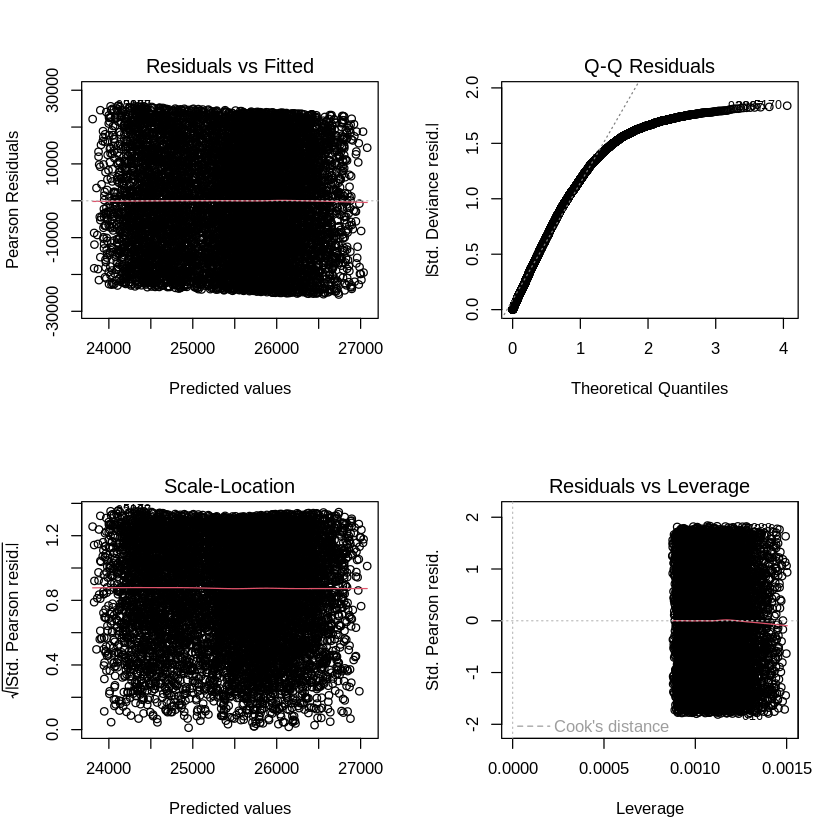

In [83]:
# Generalized Linear Model
full_model <- glm(Billing.Amount ~ Age + Gender + Medical.Condition + Length.of.Stay+Admission.Type, family = gaussian(), data = data)
summary(full_model)

# Diagnostics
par(mfrow = c(2, 2))
plot(full_model)


#### ANALYSIS

Intercept (26211.210): The estimated Billing Amount when all predictor variables are at their reference levels (i.e., Female, without any specified medical condition, Length of Stay = 0, and not an Emergency or Urgent admission). The estimate is highly statistically significant (p < 2e-16), indicating confidence in this baseline value.

Age (-6.988): For each additional year of age, the Billing Amount decreases by approximately \$6.99. This effect is not statistically significant (p = 0.330296), suggesting that age alone does not significantly influence the billing amount.

GenderMale (72.255): Being male is associated with an increase in Billing Amount of about \$72.26 compared to being female. However, this effect is not statistically significant (p = 0.797256).

Medical Conditions: None of the medical conditions show a statistically significant effect on Billing Amount at the 0.05 level, though Diabetes shows a near-significant effect (p = 0.069095) with an increase of \$893.65 in Billing Amount.

Length of Stay (-21.342): Each additional day of stay is associated with a decrease in Billing Amount by about \$21.34. This effect, while intuitive (suggesting shorter, less complicated stays are cheaper), is not statistically significant (p = 0.191242).

Admission Type:
Emergency (-1191.122): Emergency admissions are associated with a decrease in Billing Amount of about \$1191.12 compared to Elective admissions, and this **effect is statistically significant** (p = 0.000579).

Urgent (69.111): Urgent admissions show an increase in Billing Amount by about $69.11 compared to Elective admissions, but this effect is not statistically significant (p = 0.841411).



### 1. **Residuals vs. Fitted**
The residuals appear randomly scattered without forming any specific pattern. However, the wide spread suggests a potential issue with non-constant variance (heteroscedasticity).

### 2. **Q-Q Plot of Residuals**
Q-Q plot shows significant deviations from ideal line, especially in the tails, suggesting that the residuals may not be normally distributed.

### 3. **Scale-Location (Spread-Location) Plot**
The plot shows a relatively flat line, suggesting that the variance of residuals is somewhat constant. However, the vertical spread and clustering might still indicate some issues.

### 4. **Residuals vs. Leverage**
In the plot, no points significantly exceed the Cook's distance threshold, suggesting there are no overly influential outliers in the data.


# Backward Model Selection

In [86]:
# Backward elimination based on AIC
reduced_model <- step(full_model, direction = "backward")


Start:  AIC=219409.5
Billing.Amount ~ Age + Gender + Medical.Condition + Length.of.Stay + 
    Admission.Type

                    Df   Deviance    AIC
- Medical.Condition  5 1.9748e+12 219404
- Gender             1 1.9739e+12 219408
- Age                1 1.9740e+12 219408
- Length.of.Stay     1 1.9742e+12 219409
<none>                 1.9739e+12 219409
- Admission.Type     2 1.9772e+12 219423

Step:  AIC=219404.4
Billing.Amount ~ Age + Gender + Length.of.Stay + Admission.Type

                 Df   Deviance    AIC
- Gender          1 1.9748e+12 219402
- Age             1 1.9750e+12 219403
- Length.of.Stay  1 1.9752e+12 219404
<none>              1.9748e+12 219404
- Admission.Type  2 1.9781e+12 219417

Step:  AIC=219402.4
Billing.Amount ~ Age + Length.of.Stay + Admission.Type

                 Df   Deviance    AIC
- Age             1 1.9750e+12 219401
- Length.of.Stay  1 1.9752e+12 219402
<none>              1.9748e+12 219402
- Admission.Type  2 1.9782e+12 219415

Step:  AIC=219401.3


### ANALYSIS

Initial Model:

Predictors: Age, Gender, Medical Condition, Length of Stay, Admission Type
AIC: 219409.5
First Step:
Removed: Medical Condition (reduces complexity without significantly increasing AIC)
New AIC: 219404.4

Second Step:

Removed: Gender (further reduces AIC slightly)
New AIC: 219402.4

Third Step:

Removed: Age (minimal reduction in AIC)
New AIC: 219401.3

Fourth Step:

Considered removing Length of Stay but opted to keep it as removing it results in an AIC that does not improve significantly.
AIC remains at 219401.3

Fifth Step:

Removed: Length of Stay (further minimal reduction in AIC, but it's a statistical tie indicating that Length of Stay has a very minor, almost negligible impact)
Final AIC: 219401.1

In [85]:
# Print the summary of the reduced model
summary(reduced_model)

# Calculate AIC and BIC for the final model
aic_final <- AIC(reduced_model)
bic_final <- BIC(reduced_model)

# Calculate R-squared manually for a glm model
ss_res <- sum(resid(reduced_model)^2)
ss_tot <- sum((data$Billing.Amount - mean(data$Billing.Amount))^2)
r_squared <- 1 - ss_res / ss_tot

# Print AIC, BIC, and R-squared
cat("AIC:", aic_final, "\nBIC:", bic_final, "\nR-squared:", r_squared, "\n")



Call:
glm(formula = Billing.Amount ~ Admission.Type, family = gaussian(), 
    data = data)

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              25891.8      246.9 104.877  < 2e-16 ***
Admission.TypeEmergency  -1183.3      345.9  -3.421 0.000626 ***
Admission.TypeUrgent        69.0      345.3   0.200 0.841610    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 197595780)

    Null deviance: 1.9787e+12  on 9999  degrees of freedom
Residual deviance: 1.9754e+12  on 9997  degrees of freedom
AIC: 219401

Number of Fisher Scoring iterations: 2


AIC: 219401.1 
BIC: 219430 
R-squared: 0.00168007 


### ANALYSIS

Admission Type remains the only predictor in the final model, indicating it is the most statistically significant variable related to Billing Amount compared to the others tested.

#Predicting factors affecting Length of stay

## Forward Model Slection

In [94]:
library(MASS)
# Minimal model (intercept only)
minimal_model <- glm(Length.of.Stay ~ 1, family = gaussian(), data = data)

# Full model (all predictors included)
full_model <- glm(Length.of.Stay ~ Age + Gender + Medical.Condition + Billing.Amount + Admission.Type,
                  family = gaussian(), data = data)


In [95]:
# Forward selection using stepAIC
forward_selected_model <- stepAIC(minimal_model, scope = list(lower = minimal_model, upper = full_model),
                                  direction = "forward", trace = TRUE)


Start:  AIC=71444.99
Length.of.Stay ~ 1

                    Df Deviance   AIC
<none>                   741598 71445
+ Billing.Amount     1   741463 71445
+ Age                1   741536 71446
+ Gender             1   741568 71447
+ Admission.Type     2   741560 71448
+ Medical.Condition  5   741211 71450


####ANALYSIS

The stepAIC process suggests that no single variable among those tested significantly improves the model based on the AIC when added to the baseline model that only includes the intercept. Although "Medical Condition" shows a substantial reduction in deviance, it increases the AIC, suggesting that the added complexity of including it may not be justified given the criteria of AIC minimization.

# REPORT

## INTRODUCTION

"Cost and Care: Analyzing Billing Amounts and Length of Stay in Healthcare" is an investigative project that delves into the economic aspects of healthcare delivery, specifically focusing on the relationships between hospital billing amounts and the duration of patient stays. This analysis is pertinent as healthcare providers continuously seek to optimize operational efficiency and patient care, making it essential to understand the financial dynamics associated with hospital services.
Interest in this problem stems from the ongoing challenges within the healthcare system related to cost management and patient care optimization. Rising healthcare costs and the burden they place on patients, insurers, and providers alike make it crucial to explore factors that could be streamlined or managed better. Understanding how the length of hospital stays influences billing amounts could help in devising strategies to reduce costs without compromising on the quality of care.
It's important to note that hospital billing is influenced by numerous factors including the type of medical services provided, the complexity of the patient's condition, resource utilization, and administrative policies. The length of stay in a hospital is often a direct indicator of resource utilization and can vary widely depending on the medical condition and treatment required.
Previous studies have shown that longer hospital stays generally correlate with higher medical expenses due to the increased use of medical resources and extended care services. However, there are nuances to these findings, such as variations by type of treatment or differences in billing practices across hospitals and regions.
The dataset for this project were sourced from Kaggle, a platform that hosts datasets for analytical competitions and research. The dataset is experimental and is a synthetic healthcare dataset that has been created to mimic real-world healthcare data, enabling users to practice, develop, and showcase their data manipulation and analysis skills in the context of the healthcare industry.

The primary questions this project aims to answer are:

**How does the length of hospital stay impact the billing amount?**

**Are there specific factors or conditions that significantly influence the duration of hospital stays and their associated costs?**

## METHODS AND RESULTS

**Data Collection**

The dataset was obtained from Kaggle, providing a rich source of information with numerous entries representing individual patient stays across multiple healthcare facilities. The data include variables like Age, Gender, Medical Condition, Length of Stay, Admission Type, and Billing Amount.

**Exploratory Data Analysis Methods**

The exploratory data analysis (EDA) involved:

Checking for missing values: Checking and Handling missing values, and correcting any inconsistencies in the data format. Also included adding another variable called length of stay which is calculated from date of admission and discharge date
Descriptive statistics: Calculating means, medians, ranges, and standard deviations to understand the distribution and central tendencies of key variables.
Visualization: Creating histograms, box plots, and scatter plots to visually assess relationships and distributions.

**Statistical Analysis:**

Hypothesis Testing and T Test: These were used to find correlation between gender and the billing amount. It revealed that there is no significant difference in billing amount between genders.

Hypothesis Testing and ANOVA: These were used to investigate differences in billing amounts by Admission Type, Age, Medical Condition. The test showed that Admission Type significantly influences the billing amount.
Further conducting Turkey-Post Hoc Test revealed that patients admitted as Emergency had higher influence on billing amount, followed by Urgent care and finally Elective care. ANNOVA Test was also used to investigate differences in length of stay by Medical Condition and Admission Type and the test revealed that both were not significant enough to influence length of stay

Linear Regression Model: This was used to investigate the relation between length of stay and billing amount. The test showed that both the factors dont significantly influence each other.

Confidence Interval: CI was used to analyse the mean length of stay by medical condition and it revealved that
all the conditions have similar mean lengths of stay, ranging approximately from 15.42 to 15.99 days. This suggests a relatively uniform duration of hospital stays across different conditions within the dataset.

Regression Modeling and Diagnostics: A Generalized Linear Model (GLM) was used to predict billing amounts based on multiple factors such as age, medical condition, length of stay, and admission type. Model diagnostics were performed to check assumptions such as linearity, homogeneity of variances, and normality of residuals.

Model Selection and Diagnostics:
Model selection techniques were employed to refine the model based on the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). Diagnostics included analyzing residual plots, leverage plots, and Q-Q plots to ensure the model met the necessary assumptions.


**Key Findings:**

Model Selection revealed some useful interesting findings:

The estimated Billing Amount when all predictor variables are at their reference levels is equal to (26211.210)(i.e., Female, without any specified medical condition, Length of Stay = 0, and not an Emergency or Urgent admission). The estimate is highly statistically significant (p < 2e-16), indicating confidence in this baseline value.

Age: For each additional year of age, the Billing Amount decreases by approximately \$6.99. This effect is not statistically significant (p = 0.330296), suggesting that age alone does not significantly influence the billing amount.


GenderMale : Being male is associated with an increase in Billing Amount of about \$72.26 compared to being female. However, this effect is not statistically significant (p = 0.797256).

Medical Conditions: None of the medical conditions show a statistically significant effect on Billing Amount at the 0.05 level, except Diabetes which shows a near-significant effect (p = 0.069095) with an increase of \$893.65 in Billing Amount.

Length of Stay : Each additional day of stay is associated with a increase in Billing Amount by about \$21.34. This effect, is not statistically significant (p = 0.191242).

Admission Type: Emergency : Emergency admissions are associated with a increase in Billing Amount of about \$1191.12 compared to Elective admissions, and this effect is statistically significant (p = 0.000579).

Urgent (69.111): Urgent admissions show an increase in Billing Amount by about \$69.11 compared to Elective admissions, but this effect is not statistically significant (p = 0.841411).

**Graphics and Interpretation:**

Relevant graphics such as box plots and scatter plots were presented to illustrate the distribution of billing amounts by medical condition and admission type, and the relationship between age and billing amounts. These visualizations helped to interpret the results clearly, showing, for instance, that while there is variability in billing amounts across different conditions and admission types, these differences are not always statistically significant.

Model Diagnostics included the following plots

Residuals vs. Fitted:
The residuals appear randomly scattered without forming any specific pattern. However, the wide spread suggests a potential issue with non-constant variance (heteroscedasticity).

Q-Q Plot of Residuals:
Q-Q plot shows significant deviations from ideal line, especially in the tails, suggesting that the residuals may not be normally distributed.

Scale-Location (Spread-Location) Plot:
The plot shows a relatively flat line, suggesting that the variance of residuals is somewhat constant. However, the vertical spread and clustering might still indicate some issues.

Residuals vs. Leverage:
In the plot, no points significantly exceed the Cook's distance threshold, suggesting there are no overly influential outliers in the data.


The results directly addressed the research questions by demonstrating the complex interplay between length of stay, billing amounts, and medical conditions. The findings suggested that while certain factors like admission type influence billing amounts, others like medical condition do not significantly affect the length of stay.

## CONCLUSION

This research aimed to explore the relationships between patient demographics, medical conditions, length of stay, admission type, and billing amounts in healthcare settings. The most significant finding was the impact of admission type on billing amounts. Emergency admissions were associated with higher billing amounts compared to elective admissions, highlighting the economic strain of emergency care on healthcare systems. The analysis revealed that medical conditions, while varied in nature, did not significantly impact the length of stay when controlled for other factors. This suggests that other unexplored factors may influence the length of stay more significantly. Age and gender, surprisingly, had minimal impact on billing amounts. This indicates that demographic factors alone are not strong predictors of healthcare costs, contrary to common assumptions in healthcare analysis.
Through hypothesis testing, ANOVA, and regression analysis, the research provided insights into the factors that statistically influence healthcare outcomes and costs. This emphasized the value of rigorous statistical methods in uncovering trends and patterns in healthcare data.

Future research could focus on developing predictive models using machine learning techniques to forecast healthcare costs and patient outcomes more accurately. This could include using more granular data such as hourly updates from hospital records. Exploring how changes in healthcare policies affect billing amounts and patient outcomes could provide valuable insights for policymakers. This would involve longitudinal studies to track the impact of specific policy changes over time. Further research could investigate the relationship between the quality of care, patient satisfaction, and healthcare costs. This would involve integrating patient feedback and clinical outcomes into the existing dataset.

Integrating more variables such as socio-economic status, lifestyle factors, and detailed medical history could enhance the understanding of their impact on healthcare costs and outcomes.
Conducting a longitudinal study to observe how patient trajectories evolve over time and how chronic conditions impact healthcare utilization and costs longitudinally can be the next goals of current research.

In conclusion, this research has shed light on some of the critical factors influencing healthcare costs and patient management in hospital settings. The findings advocate for more targeted research into specific areas such as emergency care management and the economic implications of healthcare policies, aiming to optimize healthcare delivery and enhance patient care efficiency.